**TASK2:Data Visulization**

###Step1-Imprting Libraries and Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_excel('/content/Data2.xlsx')
#to know starting five rows
data.head()

,Product Description,Client Name,Balance Outstanding,Interest Rate,Reporting Date,Client Code
0,Product A,Client1,1000,0.05,2022-01-31,Code1
1,Product B,Client2,2000,0.06,2022-02-28,Code2
2,Product C,Client3,3000,0.07,2022-03-31,Code3
3,Product D,Client4,4000,0.08,2022-04-30,Code4
4,Product E,Client5,5000,0.09,2022-05-31,Code5


###Step2-Exploring Data Structure.

In [6]:
#finding any missing values
data.isnull().sum()

,0
Product Description,0
Client Name,0
Balance Outstanding,0
Interest Rate,0
Reporting Date,0
Client Code,0


In [24]:
#basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product Description  50 non-null     object        
 1   Client Name          50 non-null     object        
 2   Balance Outstanding  50 non-null     int64         
 3   Interest Rate        50 non-null     float64       
 4   Reporting Date       50 non-null     datetime64[ns]
 5   Client Code          50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ KB


In [8]:
#Statistical information about data
data.describe()

,Balance Outstanding,Interest Rate,Reporting Date
count,50.000000,50.000000,50
mean,25500.000000,0.070000,2024-02-14 08:09:36
min,1000.000000,0.050000,2022-01-31 00:00:00
25%,13250.000000,0.060000,2023-02-07 00:00:00
50%,25500.000000,0.070000,2024-02-14 12:00:00
75%,37750.000000,0.080000,2025-02-21 00:00:00
max,50000.000000,0.090000,2026-02-28 00:00:00
std,14577.379737,0.014286,NaN


###Step3-Data Visulization

**1. Line Chart: Total Balance Outstanding Over Time**

This chart is perfect for showing trends. It will help to see how the company's total outstanding balance has changed month by month.

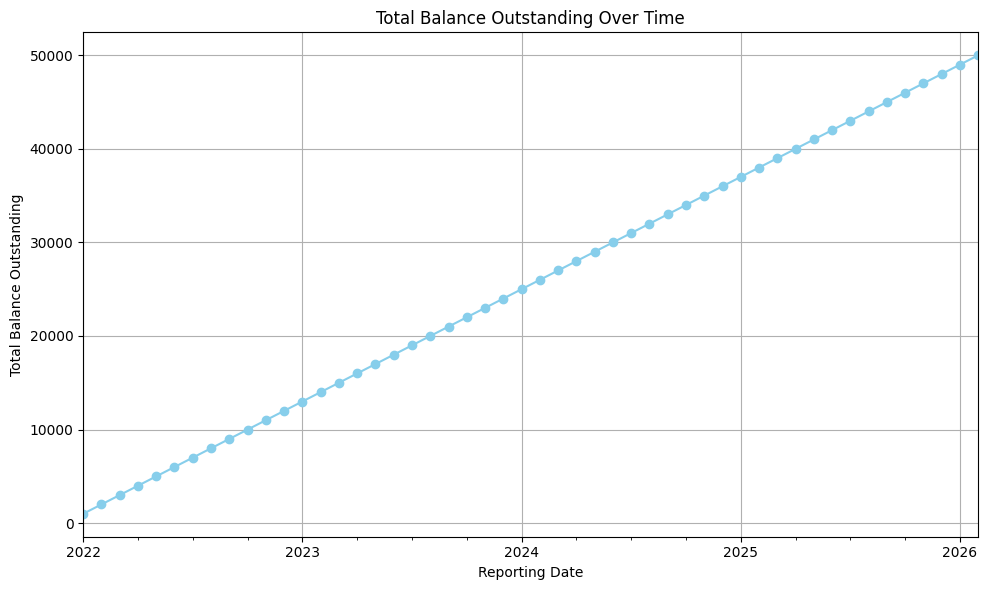

In [11]:
# Convert the 'Reporting Date' column to datetime objects
data['Reporting Date'] = pd.to_datetime(data['Reporting Date'])

# Group the data by date and sum the 'Balance Outstanding'
monthly_balance = data.groupby('Reporting Date')['Balance Outstanding'].sum()

# Create the line plot
plt.figure(figsize=(10, 6))
monthly_balance.plot(kind='line', marker='o', color='skyblue')

# Add titles and labels
plt.title('Total Balance Outstanding Over Time')
plt.xlabel('Reporting Date')
plt.ylabel('Total Balance Outstanding')
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Bar Chart: Total Balance Outstanding by Product**

This chart allows to easily compare the performance of each product category. You can quickly see which products have the highest outstanding balances.

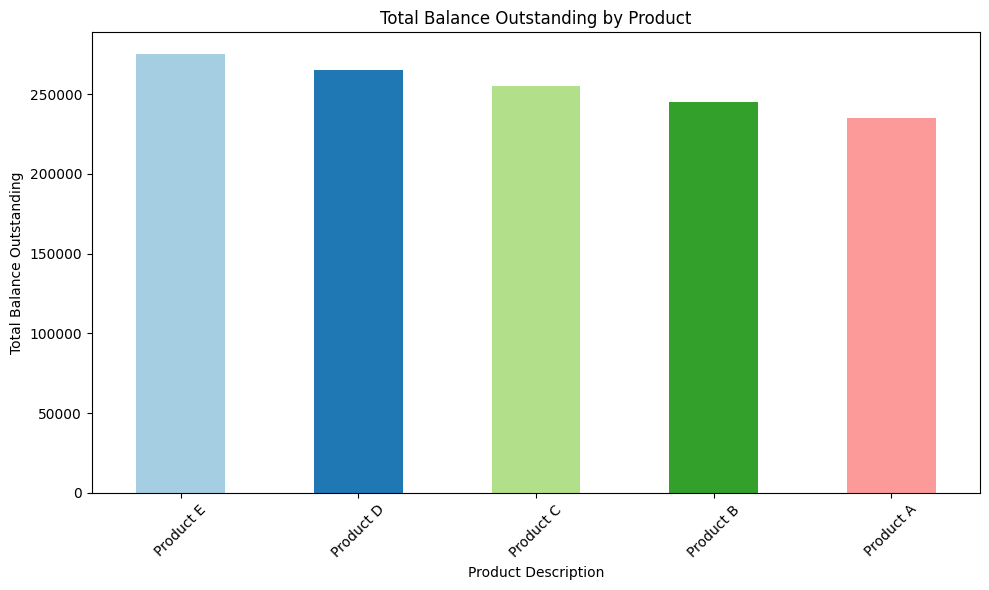

In [23]:
# Group the data by 'Product Description' and sum the 'Balance Outstanding'
product_balance = data.groupby('Product Description')['Balance Outstanding'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
product_balance.plot(kind='bar',color=plt.cm.Paired.colors)

# Add titles and labels
plt.title('Total Balance Outstanding by Product')
plt.xlabel('Product Description')
plt.ylabel('Total Balance Outstanding')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3. Scatter Plot: Balance Outstanding vs. Interest Rate**

This plot helps to explore the relationship between two numerical variables. It can reveal if there is a correlation between the amount of the outstanding balance and the interest rate.

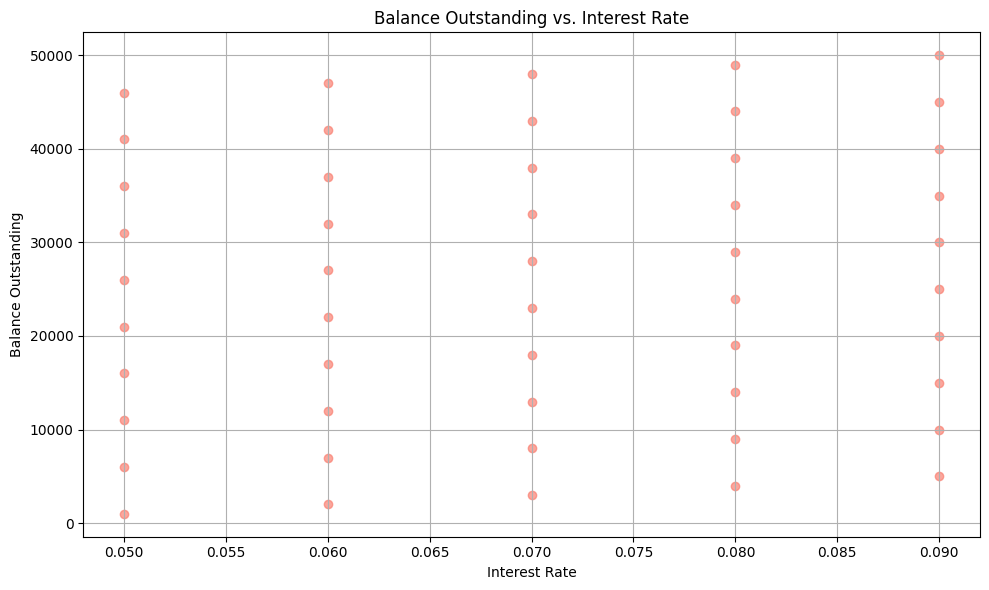

In [20]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Interest Rate'], data['Balance Outstanding'], color='salmon', alpha=0.7)

# Add titles and labels
plt.title('Balance Outstanding vs. Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Balance Outstanding')
plt.grid(True)
plt.tight_layout()
plt.show()

**4. Pie Chart: Percentage of Total Balance by Product**

A pie chart is ideal for showing how each product contributes to the total outstanding balance, giving you a clear "part-to-whole" perspective.

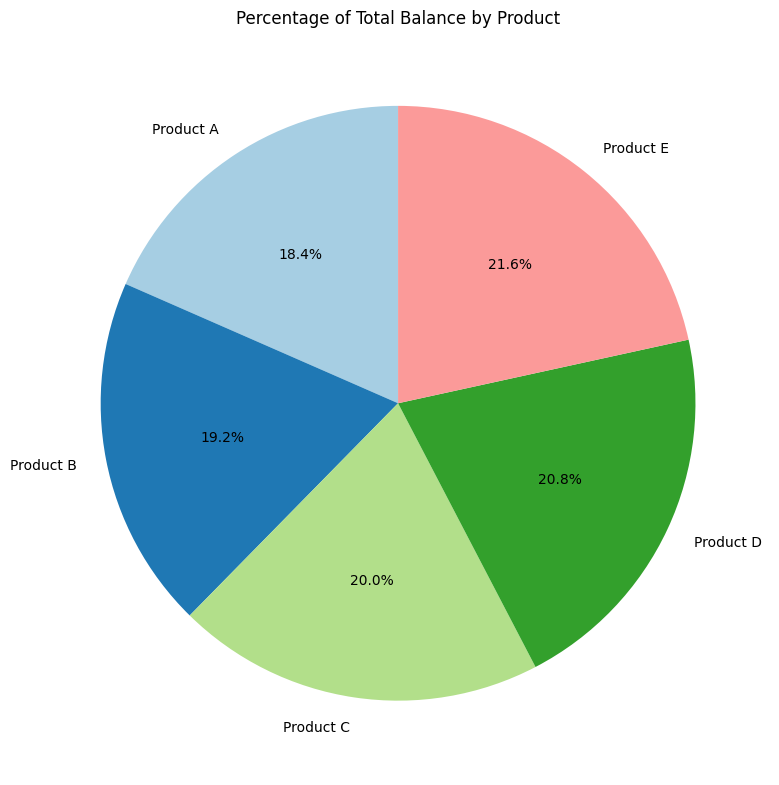

In [22]:
# Group the data by 'Product Description' and sum the 'Balance Outstanding'
product_balance = data.groupby('Product Description')['Balance Outstanding'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_balance, labels=product_balance.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Percentage of Total Balance by Product')
plt.tight_layout()
plt.show()